# Heart Failure

In [1]:
import zipfile
import pandas as pd
import ehrapy as ep
from anndata import AnnData
import warnings
warnings.filterwarnings("ignore")

Installed version 0.2.0 of ehrapy is newer than the latest release 0.1.0! You are running a 
nightly version and features may break!

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv

--2022-04-24 20:49:17--  http://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12239 (12K) [application/x-httpd-php]
Saving to: ‘heart_failure_clinical_records_dataset.csv’

heart_failure_clini 100%[===================>]  11,95K  --.-KB/s    in 0s      

2022-04-24 20:49:19 (77,3 MB/s) - ‘heart_failure_clinical_records_dataset.csv’ saved [12239/12239]



# Data Wrangling

Since the dataset does not have a patient ID we add one.

In [4]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv",
                   sep=",")

In [5]:
data["patient_id"] = range(1, len(data) + 1)

In [6]:
data.set_index("patient_id", inplace=True)

In [7]:
data.to_csv("heart_failure_ehrapy_prepared.csv")

## ehrapy sanity check

In [8]:
adata = ep.io.read_csv("heart_failure_ehrapy_prepared.csv",
                   index_column="patient_id")

In [9]:
adata.var_names

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Running KNN imputation ⠋

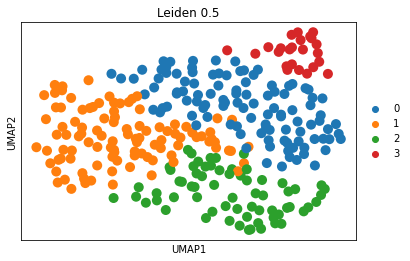

In [10]:
ep.pp.knn_impute(adata)
ep.pp.norm_scale(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

In [11]:
adata.var_names

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

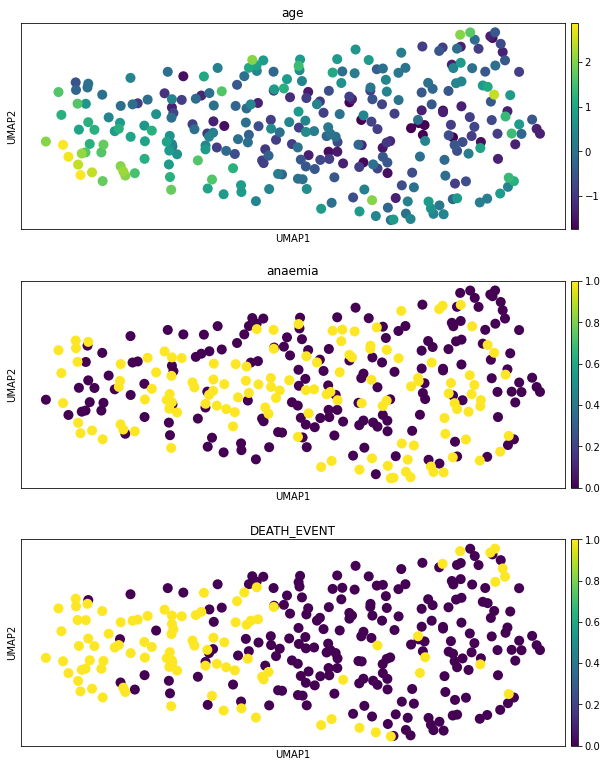

In [12]:
ep.pl.umap(adata, color=["age", "anaemia",
           "DEATH_EVENT", ], ncols=1, wspace=0.75)